In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import natsort
import pandas as pd
import scipy
import math
from sklearn.model_selection import train_test_split
import librosa
import librosa.display
from numpy.ma.core import argsort
import tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
labelDir = '/content/drive/MyDrive/Data/birdsound.csv'

In [ ]:
df=pd.read_csv(labelDir,header=None)
data=df.values

#sort the labels
sortedArr = data[data[:,0].argsort()]

#separate the file name and labels
sortedLabel=sortedArr[:,1]
sortedFileName=sortedArr[:,0]

print(sortedFileName)
print(sortedFileName[:200])

label=sortedLabel[:200]
print(label)

[   104    347   1042 ... 195343 195598 195862]
[  104   347  1042  1050  1052  1054  1945  2151  2525  2531  2537  3182
  3187  3188  3191  5204  5929  5996  5997  7151  7173  7320  7321  7542
  7543  7875  7885  7887  7991  7994  7996  9219  9221  9225  9236 11685
 11692 11696 11702 11732 12699 12704 12710 12728 13735 14314 14527 14853
 14909 15225 15226 15290 15426 15459 15466 15468 15470 15552 15553 15598
 15657 15792 16633 16765 16837 16990 16993 16995 17004 17005 17007 17008
 17054 17055 17075 17082 17136 17138 17139 17143 17147 17354 17546 17632
 18049 18050 18515 18755 18765 18806 18928 18930 19030 19037 19264 19376
 19797 19992 20001 20008 20019 20020 20067 20190 20193 20194 20381 20693
 20786 20787 20788 20988 20989 21245 21322 21601 21684 22132 22326 22327
 22522 22721 22863 23025 23026 23040 23192 23257 23415 23417 23554 23574
 23771 24950 25377 25380 25523 25526 25590 26267 26270 26906 26912 26913
 26959 26975 28287 28376 28775 28807 28809 29606 29645 29932 29982 30034
 30

In [ ]:
wavDir = '/content/drive/MyDrive/Data/sample200/'
listOfWavs = os.listdir(wavDir)
print(len(listOfWavs))
sortWavDir = natsort.natsorted(listOfWavs, reverse = False)
print(sortWavDir)

200
['104.wav', '347.wav', '1042.wav', '1050.wav', '1052.wav', '1054.wav', '1945.wav', '2151.wav', '2525.wav', '2531.wav', '2537.wav', '3182.wav', '3187.wav', '3188.wav', '3191.wav', '5204.wav', '5929.wav', '5996.wav', '5997.wav', '7151.wav', '7173.wav', '7320.wav', '7321.wav', '7542.wav', '7543.wav', '7875.wav', '7885.wav', '7887.wav', '7991.wav', '7994.wav', '7996.wav', '9219.wav', '9221.wav', '9225.wav', '9236.wav', '11685.wav', '11692.wav', '11696.wav', '11702.wav', '11732.wav', '12699.wav', '12704.wav', '12710.wav', '12728.wav', '13735.wav', '14314.wav', '14527.wav', '14853.wav', '14909.wav', '15225.wav', '15226.wav', '15290.wav', '15426.wav', '15459.wav', '15466.wav', '15468.wav', '15470.wav', '15552.wav', '15553.wav', '15598.wav', '15657.wav', '15792.wav', '16633.wav', '16765.wav', '16837.wav', '16990.wav', '16993.wav', '16995.wav', '17004.wav', '17005.wav', '17007.wav', '17008.wav', '17054.wav', '17055.wav', '17075.wav', '17082.wav', '17136.wav', '17138.wav', '17139.wav', '1714

In [ ]:
sampleAll = []
for file in sortWavDir:
  print(file)
  filePath=wavDir+file
  audio,sr = librosa.load(filePath)
  print('duration in second = ', len(audio/sr))
  fourSecSample = audio[3*sr:7*sr]
  print('duration in seconds = ',len(fourSecSample)/sr)
  sampleAll.append(fourSecSample)

sampleAll = np.asarray(sampleAll)
  

104.wav
duration in second =  220500
duration in seconds =  4.0
347.wav
duration in second =  220500
duration in seconds =  4.0
1042.wav
duration in second =  220500
duration in seconds =  4.0
1050.wav
duration in second =  220500
duration in seconds =  4.0
1052.wav
duration in second =  220500
duration in seconds =  4.0
1054.wav
duration in second =  220500
duration in seconds =  4.0
1945.wav
duration in second =  220500
duration in seconds =  4.0
2151.wav
duration in second =  220500
duration in seconds =  4.0
2525.wav
duration in second =  220500
duration in seconds =  4.0
2531.wav
duration in second =  220500
duration in seconds =  4.0
2537.wav
duration in second =  220500
duration in seconds =  4.0
3182.wav
duration in second =  220500
duration in seconds =  4.0
3187.wav
duration in second =  220500
duration in seconds =  4.0
3188.wav
duration in second =  220500
duration in seconds =  4.0
3191.wav
duration in second =  220500
duration in seconds =  4.0
5204.wav
duration in second

In [ ]:
sampleAll.shape

(200, 88200)

In [ ]:
allFeature = []
for frame in range(len(sampleAll)):
  OneSample = sampleAll[frame]
  # Energy
  energy=np.sum(np.square(OneSample)).reshape(-1,1)
  print("**********Energy***************")
  print(energy)
  # Spectral Centroid
  spectral_centroid = librosa.feature.spectral_centroid(y=OneSample, sr=sr,n_fft=20, hop_length=len(OneSample)+1, center = False, win_length = 15 )
  print("**********Spectral Centroid***************")
  print(spectral_centroid)
  #RMS
  rms = librosa.feature.rms(y=OneSample, hop_length=len(OneSample)+1)
  print("**********RMS***************")
  print(rms)

  featuresOneFrame=np.concatenate((energy, spectral_centroid, rms),axis = 0)
  print("**********One Frame***************")
  print(featuresOneFrame)
  allFeature.append(featuresOneFrame)
  

**********Energy***************
[[534.4745]]
**********Spectral Centroid***************
[[1193.18867367]]
**********RMS***************
[[0.03344607]]
**********One Frame***************
[[5.34474487e+02]
 [1.19318867e+03]
 [3.34460735e-02]]
**********Energy***************
[[68.86763]]
**********Spectral Centroid***************
[[1603.3456172]]
**********RMS***************
[[0.00322188]]
**********One Frame***************
[[6.88676300e+01]
 [1.60334562e+03]
 [3.22188088e-03]]
**********Energy***************
[[1203.6472]]
**********Spectral Centroid***************
[[909.3430849]]
**********RMS***************
[[0.05142992]]
**********One Frame***************
[[1.20364722e+03]
 [9.09343085e+02]
 [5.14299162e-02]]
**********Energy***************
[[472.65915]]
**********Spectral Centroid***************
[[1459.94815493]]
**********RMS***************
[[0.08622797]]
**********One Frame***************
[[4.72659149e+02]
 [1.45994815e+03]
 [8.62279683e-02]]
**********Energy***************
[[2001.98

In [ ]:
allFeature=np.asarray(allFeature)
print(allFeature)
print(allFeature.shape)
allFeature=np.reshape(allFeature, [200,3])
print(allFeature.shape)


[[[5.34474487e+02]
  [1.19318867e+03]
  [3.34460735e-02]]

 [[6.88676300e+01]
  [1.60334562e+03]
  [3.22188088e-03]]

 [[1.20364722e+03]
  [9.09343085e+02]
  [5.14299162e-02]]

 [[4.72659149e+02]
  [1.45994815e+03]
  [8.62279683e-02]]

 [[2.00198560e+03]
  [1.31245514e+03]
  [1.58239722e-01]]

 [[4.22132599e+02]
  [2.96413938e+03]
  [6.80321306e-02]]

 [[3.57122894e+02]
  [2.05721150e+03]
  [2.07935162e-02]]

 [[2.31777197e+03]
  [3.59427631e+03]
  [1.70027852e-01]]

 [[4.60360291e+02]
  [1.16178203e+03]
  [9.03961584e-02]]

 [[3.00909973e+02]
  [2.92966370e+03]
  [5.08491248e-02]]

 [[6.97601257e+02]
  [1.52550794e+03]
  [8.32968056e-02]]

 [[1.45516907e+02]
  [1.56928010e+03]
  [4.02990505e-02]]

 [[2.11819611e+01]
  [1.13688663e+03]
  [3.18801664e-02]]

 [[8.31493347e+02]
  [1.82111031e+03]
  [2.49606371e-01]]

 [[1.77258948e+03]
  [1.26434077e+03]
  [8.99164826e-02]]

 [[2.90126416e+03]
  [1.09946177e+03]
  [1.51803613e-01]]

 [[7.67392578e+02]
  [8.21564797e+02]
  [8.23688731e-02]

In [ ]:
from sklearn import preprocessing
allFeature_standardized = preprocessing.scale(allFeature)

print(np.mean(allFeature_standardized,axis=0))
print(np.std(allFeature_standardized,axis=0))

[ 3.63598041e-17 -8.93729535e-17 -1.44328993e-17]
[1. 1. 1.]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(allFeature_standardized, label, test_size = 0.2, random_state = 101, shuffle = True)
print(X_train.shape)
print(X_train)

(160, 3)
[[-1.52214166e-01 -1.00941197e+00  3.82510079e-02]
 [-7.15735809e-01 -7.27239061e-01 -7.65495262e-01]
 [ 4.15572167e-01 -8.38146696e-01 -1.88384682e-01]
 [-2.03185789e-01  1.03287747e+00  1.96413967e+00]
 [-1.04966595e-01  1.16047758e-01  1.07001515e+00]
 [-4.80129157e-01  1.44271004e+00 -9.51960685e-02]
 [-7.10174432e-01  2.64461531e-01 -7.97281841e-01]
 [-5.98901504e-01 -3.66866559e-01 -1.21393096e+00]
 [ 8.70049032e-01 -5.92003088e-01  1.25334843e+00]
 [ 1.61466638e+00 -7.73113444e-01  1.15027195e+00]
 [-7.30604240e-01 -3.44656051e-01 -1.22931496e+00]
 [ 2.29501341e+00 -9.72010532e-01  1.09790012e+00]
 [-7.18527673e-01  2.06525122e+00 -1.09584769e+00]
 [-6.92830600e-01 -1.01004701e+00 -6.86053501e-01]
 [-5.38469388e-01  7.83125255e-01 -4.66548469e-01]
 [-1.84414470e-01  2.15990283e+00 -9.80111846e-01]
 [-1.76522440e-01 -5.95656991e-01  4.84359035e-01]
 [ 4.73281091e-04  4.90526427e-01  1.43084512e+00]
 [-7.33354512e-01 -2.95397330e-01 -7.20021941e-01]
 [ 1.80356206e+00  1.4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 d1 (Dense)                  (None, 2)                 8         
                                                                 
 d2 (Dense)                  (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None


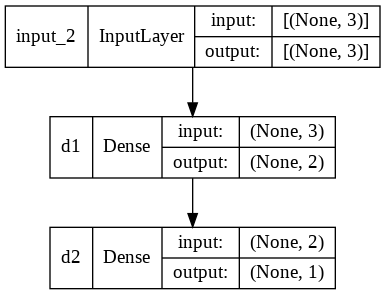

In [ ]:
from keras import activations
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

my_model = Sequential()
my_model.add(Input(shape = (3,)))
my_model.add(Dense(2, activation = 'relu', name='d1'))
my_model.add(Dense(1, activation = 'relu', name = 'd2'))
# my_model.add(Dense(4, activation = 'relu', name = 'd3'))
# my_model.add(Dense(1, activation = 'sigmoid', name = 'out'))

print(my_model.summary())

plot_model(my_model, to_file='model_graph.png', show_shapes=True, show_layer_names = True)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 modelInput (InputLayer)     [(None, 3)]               0         
                                                                 
 hid1 (Dense)                (None, 2)                 8         
                                                                 
 modelOutput (Dense)         (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None


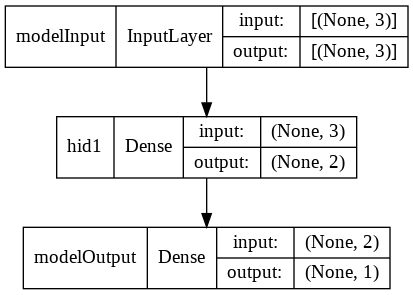

In [ ]:
# Multilayer Perceptron
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(3,),name='modelInput')
hidden1 = Dense(2, activation='relu',name='hid1')(visible)
hidden2 = Dense(1, activation='relu',name='hid2')(hidden1)

# output = Dense(3, activation='softmax',name='modelOutput')(hidden3)##if 3-class classification
output = Dense(1, activation='sigmoid',name='modelOutput')(hidden1)##if 2-class classification

my_model = Model(inputs=visible, outputs=output)
# summarize layers
print(my_model.summary())
# plot graph
plot_model(my_model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)


#Note: in hidden layers you may try different activation functions like: tanh, leaky relu, elu, maxout, etc.
# in last layer use 'linear' for regression problems.

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
my_model.compile(loss = 'binary_crossentropy', optimizer =Adam(learning_rate = 0.001), metrics= ['accuracy', 'mse', 'mae'])


In [ ]:
my_history = my_model.fit(X_train, Y_train, epochs = 50, batch_size=4, verbose=1, validation_split=0.1)

Epoch 1/50
36/36 [==============================] - 1s 8ms/step - loss: 0.6854 - accuracy: 0.5833 - mse: 0.2422 - mae: 0.4688 - val_loss: 0.6789 - val_accuracy: 0.5625 - val_mse: 0.2437 - val_mae: 0.4869
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6042 - mse: 0.2404 - mae: 0.4670 - val_loss: 0.6818 - val_accuracy: 0.5000 - val_mse: 0.2451 - val_mae: 0.4879
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6528 - mse: 0.2385 - mae: 0.4641 - val_loss: 0.6858 - val_accuracy: 0.5625 - val_mse: 0.2472 - val_mae: 0.4890
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6597 - mse: 0.2366 - mae: 0.4615 - val_loss: 0.6889 - val_accuracy: 0.5625 - val_mse: 0.2487 - val_mae: 0.4898
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6736 - mse: 0.2352 - mae: 0.4600 - val_loss: 0.6913 - val_accuracy: 0.5625 - val_mse: 0.249

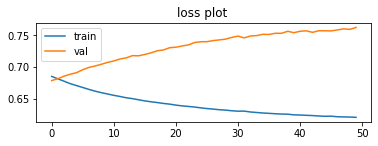

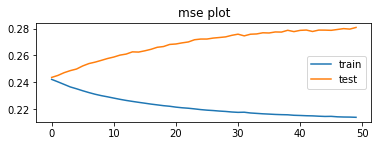

In [ ]:
# plot loss
plt.subplot(211)
plt.title('loss plot ')
plt.plot(my_history.history['loss'], label='train')
plt.plot(my_history.history['val_loss'], label='val')
plt.legend()
plt.show()

# plot mse during training
plt.subplot(212)
plt.title('mse plot')
plt.plot(my_history.history['mse'], label='train')
plt.plot(my_history.history['val_mse'], label='test')
plt.legend()
plt.show()


In [ ]:
import keras

#### make class predictions with the model
Y_pred = my_model.predict(X_test)
#########direct evaluaion
score = my_model.evaluate(X_test, Y_test, verbose=1)
print(score[1])

############ OR ##################
############### evaluate using sklearn
Y_pred[Y_pred >= 0.5] = 1
Y_pred[Y_pred < 0.5] = 0


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

2/2 [==============================] - 0s 5ms/step - loss: 0.6529 - accuracy: 0.7000 - mse: 0.2289 - mae: 0.4486
0.699999988079071
[[28  0]
 [12  0]]
0.7


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 modelInput (InputLayer)     [(None, 3)]               0         
                                                                 
 hid1 (Dense)                (None, 2)                 8         
                                                                 
 hid2 (Dense)                (None, 1)                 3         
                                                                 
 modelOutput (Dense)         (None, 1)                 2         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


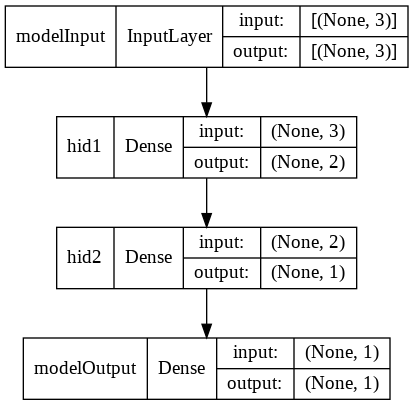

In [ ]:
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(3,),name='modelInput')
hidden1 = Dense(2, activation='elu',name='hid1')(visible)
hidden2 = Dense(1, activation='elu',name='hid2')(hidden1)

# output = Dense(3, activation='softmax',name='modelOutput')(hidden3)##if 3-class classification
output = Dense(1, activation='sigmoid',name='modelOutput')(hidden2)##if 2-class classification

my_model = Model(inputs=visible, outputs=output)
# summarize layers
print(my_model.summary())
# plot graph
plot_model(my_model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)


#Note: in hidden layers you may try different activation functions like: tanh, leaky relu, elu, maxout, etc.
# in last layer use 'linear' for regression problems.

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
my_model.compile(loss = 'binary_crossentropy', optimizer =Adam(learning_rate = 0.001), metrics= ['accuracy', 'mse', 'mae'])
my_history = my_model.fit(X_train, Y_train, epochs = 50, batch_size=4, verbose=1, validation_split=0.1)

Epoch 1/50
36/36 [==============================] - 1s 7ms/step - loss: 0.7011 - accuracy: 0.5417 - mse: 0.2534 - mae: 0.4967 - val_loss: 0.7135 - val_accuracy: 0.5000 - val_mse: 0.2596 - val_mae: 0.5032
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6042 - mse: 0.2444 - mae: 0.4879 - val_loss: 0.7084 - val_accuracy: 0.3750 - val_mse: 0.2574 - val_mae: 0.5016
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6528 - mse: 0.2379 - mae: 0.4808 - val_loss: 0.7048 - val_accuracy: 0.3125 - val_mse: 0.2558 - val_mae: 0.4998
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6806 - mse: 0.2320 - mae: 0.4736 - val_loss: 0.7031 - val_accuracy: 0.4375 - val_mse: 0.2550 - val_mae: 0.4983
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6667 - mse: 0.2279 - mae: 0.4679 - val_loss: 0.7015 - val_accuracy: 0.5625 - val_mse: 0.254

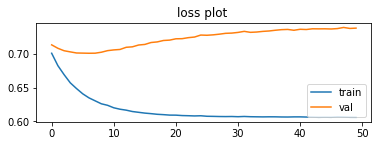

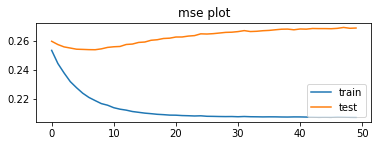

In [ ]:
# plot loss
plt.subplot(211)
plt.title('loss plot ')
plt.plot(my_history.history['loss'], label='train')
plt.plot(my_history.history['val_loss'], label='val')
plt.legend()
plt.show()

# plot mse during training
plt.subplot(212)
plt.title('mse plot')
plt.plot(my_history.history['mse'], label='train')
plt.plot(my_history.history['val_mse'], label='test')
plt.legend()
plt.show()

In [ ]:
import keras

#### make class predictions with the model
Y_pred = my_model.predict(X_test)
#########direct evaluaion
score = my_model.evaluate(X_test, Y_test, verbose=1)
print(score[1])

############ OR ##################
############### evaluate using sklearn
Y_pred[Y_pred >= 0.5] = 1
Y_pred[Y_pred < 0.5] = 0


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

2/2 [==============================] - 0s 7ms/step - loss: 0.6333 - accuracy: 0.7000 - mse: 0.2193 - mae: 0.4284
0.699999988079071
[[28  0]
 [12  0]]
0.7


**Feature 2**

In [ ]:
from librosa.feature.spectral import spectral_bandwidth
allFeature2 = []
for frame in range(len(sampleAll)):
  OneSample2 = sampleAll[frame]
  ##ZCR
  zcr=librosa.feature.zero_crossing_rate(OneSample,hop_length=len(OneSample2)+1)
  # Spectral Roll_off
  spectral_rolloff = librosa.feature.spectral_rolloff(y=OneSample2, sr=sr,n_fft=20, hop_length=len(OneSample)+1, center = False, win_length = 15 )
  #Spectral Bandwidth
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y=OneSample2, hop_length=len(OneSample)+1)

  featuresOneFrame2=np.concatenate((zcr, spectral_rolloff, spectral_bandwidth),axis = 0)
  allFeature2.append(featuresOneFrame2)

allFeature2 = np.asarray(allFeature2)


In [ ]:
print(zcr.shape)
print(spectral_rolloff.shape)
print(spectral_bandwidth.shape)
print(allFeature2.shape)
allFeature2=np.asarray(allFeature2)
print(allFeature2.shape)
allFeature2=np.reshape(allFeature2, [200,3])
print(allFeature2.shape)


(1, 1)
(1, 1)
(1, 1)
(200, 3, 1)
(200, 3, 1)
(200, 3)


In [ ]:
from sklearn import preprocessing
allFeature2_standardized = preprocessing.scale(allFeature2)

print(np.mean(allFeature2_standardized,axis=0))
print(np.std(allFeature2_standardized,axis=0))
print(allFeature2_standardized.shape)

[ 0.00000000e+00 -3.88578059e-18  1.15074617e-15]
[0. 1. 1.]
(200, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allFeature2_standardized, label, test_size=0.20, random_state=101,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 modelInput (InputLayer)     [(None, 3)]               0         
                                                                 
 hid1 (Dense)                (None, 2)                 8         
                                                                 
 hid2 (Dense)                (None, 1)                 3         
                                                                 
 modelOutput (Dense)         (None, 1)                 2         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


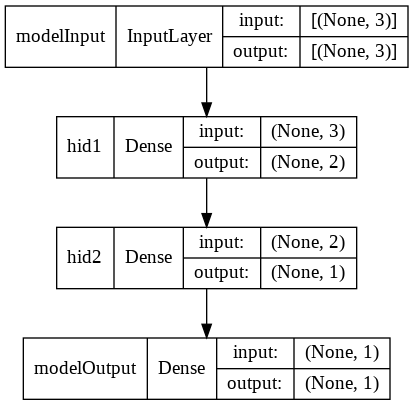

In [ ]:
# Multilayer Perceptron
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(3,),name='modelInput')
hidden1 = Dense(2, activation='relu',name='hid1')(visible)
hidden2 = Dense(1, activation='relu',name='hid2')(hidden1)


# output = Dense(3, activation='softmax',name='modelOutput')(hidden3)##if 3-class classification
output = Dense(1, activation='sigmoid',name='modelOutput')(hidden2)##if 2-class classification

my_model = Model(inputs=visible, outputs=output)
# summarize layers
print(my_model.summary())
# plot graph
plot_model(my_model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)


#Note: in hidden layers you may try different activation functions like: tanh, leaky relu, elu, maxout, etc.
# in last layer use 'linear' for regression problems.

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
my_model.compile(loss = 'binary_crossentropy', optimizer =Adam(learning_rate = 0.001), metrics= ['accuracy', 'mse', 'mae'])
my_history = my_model.fit(X_train, Y_train, epochs = 50, batch_size=4, verbose=1, validation_split=0.1)

Epoch 1/50
36/36 [==============================] - 1s 8ms/step - loss: 0.6846 - accuracy: 0.7014 - mse: 0.2457 - mae: 0.4956 - val_loss: 0.6945 - val_accuracy: 0.5625 - val_mse: 0.2507 - val_mae: 0.5005
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.7014 - mse: 0.2422 - mae: 0.4916 - val_loss: 0.6943 - val_accuracy: 0.5625 - val_mse: 0.2506 - val_mae: 0.5002
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.7014 - mse: 0.2384 - mae: 0.4873 - val_loss: 0.6947 - val_accuracy: 0.5625 - val_mse: 0.2508 - val_mae: 0.5000
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.7014 - mse: 0.2349 - mae: 0.4828 - val_loss: 0.6959 - val_accuracy: 0.5625 - val_mse: 0.2513 - val_mae: 0.4999
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.7014 - mse: 0.2313 - mae: 0.4779 - val_loss: 0.6975 - val_accuracy: 0.5625 - val_mse: 0.252

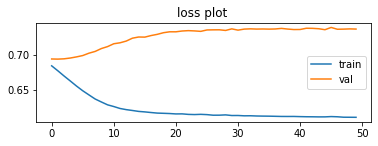

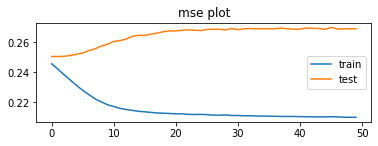

In [ ]:
# plot loss
plt.subplot(211)
plt.title('loss plot ')
plt.plot(my_history.history['loss'], label='train')
plt.plot(my_history.history['val_loss'], label='val')
plt.legend()
plt.show()

# plot mse during training
plt.subplot(212)
plt.title('mse plot')
plt.plot(my_history.history['mse'], label='train')
plt.plot(my_history.history['val_mse'], label='test')
plt.legend()
plt.show()

In [ ]:
import keras

#### make class predictions with the model
Y_pred = my_model.predict(X_test)
print(Y_pred)
#########direct evaluaion
score = my_model.evaluate(X_test, Y_test, verbose=1)
print(score[1])

############ OR ##################
############### evaluate using sklearn
Y_pred[Y_pred >= 0.5] = 1
Y_pred[Y_pred < 0.5] = 0


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[0.3346881 ]
 [0.3657586 ]
 [0.3657586 ]
 [0.2731055 ]
 [0.31588858]
 [0.3657586 ]
 [0.3003813 ]
 [0.26016748]
 [0.3657586 ]
 [0.3004076 ]
 [0.3657586 ]
 [0.3657586 ]
 [0.3657586 ]
 [0.3657586 ]
 [0.2268526 ]
 [0.3657586 ]
 [0.3657586 ]
 [0.26043326]
 [0.3657586 ]
 [0.3657586 ]
 [0.3657586 ]
 [0.31956136]
 [0.3657586 ]
 [0.28608835]
 [0.27187866]
 [0.3657586 ]
 [0.31087276]
 [0.17705536]
 [0.3657586 ]
 [0.23476696]
 [0.29558188]
 [0.28284812]
 [0.32156008]
 [0.3657586 ]
 [0.2719887 ]
 [0.3657586 ]
 [0.30450588]
 [0.23552698]
 [0.3657586 ]
 [0.30684233]]
2/2 [==============================] - 0s 7ms/step - loss: 0.5895 - accuracy: 0.7000 - mse: 0.2011 - mae: 0.4165
0.699999988079071
[[28  0]
 [12  0]]
0.7


Model **2**

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 modelInput (InputLayer)     [(None, 3)]               0         
                                                                 
 hid1 (Dense)                (None, 1)                 4         
                                                                 
 modelOutput (Dense)         (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


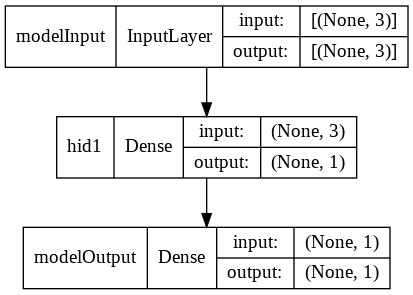

In [ ]:
# Multilayer Perceptron
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(3,),name='modelInput')
hidden1 = Dense(1, activation='elu',name='hid1')(visible)


# output = Dense(3, activation='softmax',name='modelOutput')(hidden3)##if 3-class classification
output = Dense(1, activation='sigmoid',name='modelOutput')(hidden1)##if 2-class classification

my_model = Model(inputs=visible, outputs=output)
# summarize layers
print(my_model.summary())
# plot graph
plot_model(my_model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
my_model.compile(loss = 'binary_crossentropy', optimizer =Adam(learning_rate = 0.001), metrics= ['accuracy', 'mse', 'mae'])
my_history = my_model.fit(X_train, Y_train, epochs = 50, batch_size=4, verbose=1, validation_split=0.1)

Epoch 1/50
36/36 [==============================] - 1s 7ms/step - loss: 0.7378 - accuracy: 0.5486 - mse: 0.2699 - mae: 0.5106 - val_loss: 0.7222 - val_accuracy: 0.4375 - val_mse: 0.2653 - val_mae: 0.5053
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.7254 - accuracy: 0.5347 - mse: 0.2646 - mae: 0.5068 - val_loss: 0.7156 - val_accuracy: 0.4375 - val_mse: 0.2620 - val_mae: 0.5035
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.5486 - mse: 0.2600 - mae: 0.5032 - val_loss: 0.7099 - val_accuracy: 0.3750 - val_mse: 0.2590 - val_mae: 0.5019
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.5556 - mse: 0.2560 - mae: 0.5002 - val_loss: 0.7043 - val_accuracy: 0.4375 - val_mse: 0.2561 - val_mae: 0.5001
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5694 - mse: 0.2518 - mae: 0.4966 - val_loss: 0.7007 - val_accuracy: 0.4375 - val_mse: 0.254

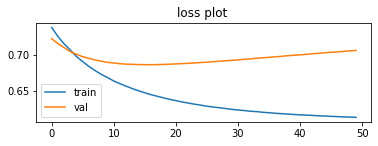

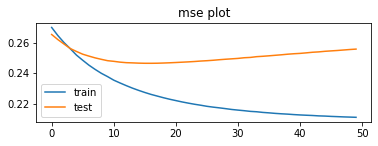

In [ ]:
# plot loss
plt.subplot(211)
plt.title('loss plot ')
plt.plot(my_history.history['loss'], label='train')
plt.plot(my_history.history['val_loss'], label='val')
plt.legend()
plt.show()

# plot mse during training
plt.subplot(212)
plt.title('mse plot')
plt.plot(my_history.history['mse'], label='train')
plt.plot(my_history.history['val_mse'], label='test')
plt.legend()
plt.show()

In [ ]:
import keras

#### make class predictions with the model
Y_pred = my_model.predict(X_test)
print(Y_pred)
#########direct evaluaion
score = my_model.evaluate(X_test, Y_test, verbose=1)
print(score[1])

############ OR ##################
############### evaluate using sklearn
Y_pred[Y_pred >= 0.5] = 1
Y_pred[Y_pred < 0.5] = 0


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[0.3396901 ]
 [0.33847052]
 [0.33910787]
 [0.33975214]
 [0.3395533 ]
 [0.3394645 ]
 [0.33970445]
 [0.33982942]
 [0.3385812 ]
 [0.33970433]
 [0.33864576]
 [0.33931226]
 [0.3389533 ]
 [0.33900464]
 [0.33987182]
 [0.3389908 ]
 [0.33929482]
 [0.3398288 ]
 [0.33938587]
 [0.33929163]
 [0.33827406]
 [0.33968824]
 [0.33920795]
 [0.3397029 ]
 [0.33979955]
 [0.33939928]
 [0.33965975]
 [0.3399365 ]
 [0.3393305 ]
 [0.33988   ]
 [0.339723  ]
 [0.33976704]
 [0.33967996]
 [0.33810073]
 [0.33979926]
 [0.33863717]
 [0.3397442 ]
 [0.33987874]
 [0.33936346]
 [0.3397833 ]]
2/2 [==============================] - 0s 9ms/step - loss: 0.6144 - accuracy: 0.7000 - mse: 0.2116 - mae: 0.4358
0.699999988079071
[[28  0]
 [12  0]]
0.7
